
---

# Machine Learning: Average car prices - Brazil
Dataset Kaggle: [Average car prices - Brazil](https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil/data)<br>
Meu projeto no Kaggle: [Link do projeto](https://www.kaggle.com/code/nerdygames/machine-learning-average-car-prices-brazil)<br>
Autor: Bruno Pereira<br>

---

## 1\. Contexto

**Descrição do Problema/Base de dados:** A base de dados consiste no preço médio dos carros do Brasil segundo a tabela FIPE durante os anos de 2021 e 2023. Cada linha corresponde a uma pesquisa do preço médio de um carro. Meu objetivo é desenvolver um modelo de Machine Learning para fazer previsões dos preços médios. Utilizei como guia os conceitos ensinados pela **EBAC**(*Escola Britânica de Artes e Tecnologia*), o livro: **Estatística Prática para Cientistas de Dados**(*Autores: Peter Bruce & Andrew Bruce*) e o curso da Udemy: **Machine Learning e Data Science com Python de A a Z**(*Professor: Jones Granatyr*) <br>

OBS: Não me aprofundarei na análise exploratória desses dados pois essa é a continuação de um outro notebook onde fiz essa análise, caso tenha interesse pode conferir meu outro projeto nesse [link](https://www.kaggle.com/code/nerdygames/aed-average-car-prices-brazil).

## 2\. Pacotes, bibliotecas & Importações

**Pacotes utilizados**

In [1]:
import pandas as pd
import numpy as np

## Utilizados no Pré processamento
from sklearn.preprocessing import LabelEncoder # Utilizado para converter dados categóricos em valores numéricos
from sklearn.model_selection import train_test_split # Utilizado para dividir a amostra em treino e teste

# Algoritmos de regressão
from sklearn.tree import DecisionTreeRegressor # Algoritmo de árvore de decisão utilizado para fazer a regressão
from sklearn.ensemble import RandomForestRegressor # Algoritmo de Random Forest utilizado para fazer a regressão

# Bibliotecas utilizadas para plotar a árvore
import matplotlib.pyplot as plt
from sklearn import tree

# Usados para avaliar o resultado os modelos de regressão
from sklearn.metrics import mean_absolute_error, mean_squared_error 

# Usado para fazer o Tunning dos parâmetros dos modelos de regressão
from sklearn.model_selection import GridSearchCV

## Bibliotecas utilizadas para fazer a validação cruzada
from sklearn.model_selection import cross_validate, KFold 
from sklearn.metrics import make_scorer

**Funções desenvolvidas que serão utilizadas**

In [2]:
# Função utilizada para verificar os valores únicos
def verifica_valores_unicos(DataFrame: pd.DataFrame, colunas_ignoradas: list|str|None) -> None:
    for x in DataFrame.columns:
    
        if type(colunas_ignoradas) == str:
            if x != colunas_ignoradas:
                print('++'*30)
                print(f'NOME DA COLUNA COLUNA: "{x}"')
                print('--'*5)
                print('VALORES ÚNICOS:')
                print(f'{DataFrame[x].unique()}')
                print('--'*5)
                print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
                print('++'*30)
                print('\n')
        
        elif type(colunas_ignoradas) == list:
            if x not in colunas_ignoradas:
                print('++'*30)
                print(f'NOME DA COLUNA COLUNA: "{x}"')
                print('--'*5)
                print('VALORES ÚNICOS:')
                print(f'{DataFrame[x].unique()}')
                print('--'*5)
                print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
                print('++'*30)
                print('\n')

        else:
            print('++'*30)
            print(f'NOME DA COLUNA COLUNA: "{x}"')
            print('--'*5)
            print('VALORES ÚNICOS:')
            print(f'{DataFrame[x].unique()}')
            print('--'*5)
            print(f'CONTAGEM DOS VALORES ÚNICOS: {len(DataFrame[x].unique())}')
            print('++'*30)
            print('\n')

# Função utilizada para avaliar o modelo de regressão
def avalia_modelo_regressao(x, y, modelo_regressao):
    
    previsao = modelo_regressao.predict(x)
    # Calculando o R2
    r2 = modelo_regressao.score(x, y)
    print(f"O R2 é: {r2}")
    # Calculando o MAE
    mae = mean_absolute_error(y, previsao)
    print(f"O MAE é: {mae}")
    # Calculando o MSE
    mse = mean_squared_error(y, previsao)
    print(f"O MSE é: {mse}")
    # Calculando o RMSE
    rmse = np.sqrt(mse)
    print(f"O RMSE é: {rmse}")

# Função para prever um novo valor que não está na amostra
def novo_valor_para_prever(lista_com_novo_valor: list, modelo_treinado):
    # Transformar as variáveis categóricas usando os LabelEncoders já criados anteriormente
    lista_com_novo_valor[0][0] = label_encoder_mes.transform([lista_com_novo_valor[0][0]])[0]  # mes_de_referencia
    lista_com_novo_valor[0][4] = label_encoder_marca.transform([lista_com_novo_valor[0][4]])[0]  # marca
    lista_com_novo_valor[0][5] = label_encoder_modelo.transform([lista_com_novo_valor[0][5]])[0]  # modelo
    lista_com_novo_valor[0][7] = label_encoder_combustivel.transform([lista_com_novo_valor[0][7]])[0]  # combustivel
    lista_com_novo_valor[0][8] = label_encoder_cambio.transform([lista_com_novo_valor[0][8]])[0]  # cambio

    # Prever o resultado para o novo valor
    previsao_novo_valor = modelo_treinado.predict(lista_com_novo_valor)

    # Exibir a previsão
    print(f"A previsão do preço médio para esse novo modelo é: {previsao_novo_valor[0]}")

**Importação da base de dados**

In [3]:
df_FIPE_carros = pd.read_csv("./Materiais extras das aulas/Base - Preço medio carros Brasil/fipe_cars.csv")

## 3\. Exploração inicial dos dados

**Verificando as primieras linhas do DataFrame**

In [12]:
df_FIPE_carros.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,038001-6,tlp4qry07m,Acura,NSX 3.0,Gasoline,manual,3.0,1995,40374.0
1,2021,January,038001-6,s1wksdv9by,Acura,NSX 3.0,Gasoline,manual,3.0,1994,38939.0
2,2021,January,038001-6,skrbcfnkch,Acura,NSX 3.0,Gasoline,manual,3.0,1993,37648.0
3,2021,January,038001-6,rxzh76d5db,Acura,NSX 3.0,Gasoline,manual,3.0,1992,35962.0
4,2021,January,038001-6,qrm322tpd8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,32863.0


**Verificando a dimensionalidade do DataFrame**

In [22]:
df_FIPE_carros.shape

(599004, 10)

**Informações gerais sobre o DataFrame**

In [15]:
df_FIPE_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599007 entries, 0 to 599006
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   599007 non-null  int64  
 1   month_of_reference  599007 non-null  object 
 2   fipe_code           599007 non-null  object 
 3   authentication      599007 non-null  object 
 4   brand               599007 non-null  object 
 5   model               599007 non-null  object 
 6   fuel                599007 non-null  object 
 7   gear                599007 non-null  object 
 8   engine_size         599007 non-null  float64
 9   year_model          599007 non-null  int64  
 10  avg_price_brl       599007 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 50.3+ MB


**Conclusão:** Podemos notar que o DataFrame é bom limpo e consistente, sendo necessário apenas algumas conversões do tipo de alguns dados. Notamos também que a maioria dos atributos são categóricos nominais, com exeção da coluna ``month_of_reference`` que é uma coluna categórica ordinal. Existem também atributos Numéricos Contínuos e Numéricos Discretos:
- Atributos Categóricos:
    - **Nominais:** ``fipe_code``, ``authentication``, ``brand``, ``model``, ``fuel`` e ``gear``;
    - **Ordinais:** ``month_of_reference``;
- Atributos Numéricos:
    - **Contínuos:** ``avg_price_brl``, ``engine_size``;
    - **Discretos:** ``year_of_reference`` ,``year_model``.

In [18]:
# Verificando a existência de valores duplicados
valores_duplicados = df_FIPE_carros[df_FIPE_carros.duplicated()]
print("Quantidade de linhas duplicadas:",len(valores_duplicados))
valores_duplicados

Quantidade de linhas duplicadas: 3


,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
135875,2021,June,025232-8,5rtdwkpkpq5h,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,manual,2.0,2018,69893.0
383231,2022,May,004051-7,gb76cyvp29j4,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,manual,2.0,1992,10655.0
559711,2022,December,003296-4,3r6c277cnqcb,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,manual,3.0,2007,64638.0


**Conclusão:** Existem 3 valores duplicados nessa base de dados que faremos a exclusão na etapa de Wrangling.

**Verificando as informações sobre únicas sobre alguns atributos**

In [19]:
verifica_valores_unicos(DataFrame=df_FIPE_carros, colunas_ignoradas=['authentication', 'avg_price_brl'])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "year_of_reference"
----------
VALORES ÚNICOS:
[2021 2022 2023]
----------
CONTAGEM DOS VALORES ÚNICOS: 3
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "month_of_reference"
----------
VALORES ÚNICOS:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
CONTAGEM DOS VALORES ÚNICOS: 12
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "fipe_code"
----------
VALORES ÚNICOS:
['038001-6' '038002-4' '038003-2' ... '005538-7' '005539-5' '005540-9']
----------
CONTAGEM DOS VALORES ÚNICOS: 5956
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NOME DA COLUNA COLUNA: "brand"
-

## 4\. Wrangling e Pré Processamento

**Excluindo as linhas duplicadas**

In [4]:
df_FIPE_carros.drop_duplicates(inplace=True)

**Excluindo as colunas que não utilizaremos**

In [5]:
df_FIPE_carros.drop(columns=['authentication', 'fipe_code'], inplace=True)

**Criação de uma coluna com a idade do carro para faciliar a compreensão**
- **OBS:** Utilizei o código ``df['idade_carro'] = df['idade_carro'].apply(lambda x: 0 if x < 0 else x)`` pois caso for feita apenas a subtração entre as colunas year_of_reference e year_model gerará alguns idades com o valor -1 por causa da forma como os anos são registrados na tabela FIPE. Especificamente, quando um carro é registrado como "modelo do próximo ano", ele terá um year_model maior que o year_of_reference, resultando em um valor negativo ao calcular a idade do carro.

In [6]:
df_FIPE_carros["Idade_do_automovel"] = df_FIPE_carros['year_of_reference'] - df_FIPE_carros['year_model']
df_FIPE_carros['Idade_do_automovel'] = df_FIPE_carros['Idade_do_automovel'].apply(lambda x: 0 if x < 0 else x)

**Renomeando as colunas**

In [7]:
df_FIPE_carros.rename(columns={'year_of_reference': 'ano_de_referencia', 
                               'month_of_reference': 'mes_de_referencia',
                               'brand': 'marca', 
                               'model': 'modelo', 
                               'fuel': 'combustivel', 
                               'gear': 'cambio', 
                               'engine_size': 'potencia_do_motor', 
                               'year_model': 'ano_modelo', 
                               'avg_price_brl': 'preco_medio_FIPE', 
                                }, 
                    inplace = True)

**Reordenando as colunas para facilitar a compreensão e a divisão das Variáveis independentes e das Variáveis resposta**

In [8]:
df_FIPE_carros = df_FIPE_carros[['mes_de_referencia', 'ano_de_referencia', 'ano_modelo', 'Idade_do_automovel', 'marca'
                                 , 'modelo','potencia_do_motor', 'combustivel', 'cambio', 'preco_medio_FIPE']]

**Dividindo a amostra em variável resposta e variáveis independentes**

In [9]:
nome_das_variaveis_independentes = list(df_FIPE_carros.iloc[:, 0:9].columns)

X_carros = df_FIPE_carros.iloc[:, 0:9].values # Variáveis independentes
Y_carros = df_FIPE_carros.iloc[:, 9].values # Variável resposta

In [10]:
X_carros

array([['January', 2021, 1995, ..., 3.0, 'Gasoline', 'manual'],
       ['January', 2021, 1994, ..., 3.0, 'Gasoline', 'manual'],
       ['January', 2021, 1993, ..., 3.0, 'Gasoline', 'manual'],
       ...,
       ['January', 2023, 2007, ..., 1.6, 'Gasoline', 'manual'],
       ['January', 2023, 2006, ..., 1.6, 'Gasoline', 'manual'],
       ['January', 2023, 2005, ..., 1.6, 'Gasoline', 'manual']],
      dtype=object)

**Conclusão:** Perceba que alguns atributos estão com o tipo de dados categórico, ou seja, são textos, porém os algoritmos que iremos utilizar não aceita esse tipo como entrada, por isso será necessário efetuarmos um processamento para fazer essa conversão desses tipos de dados.

**Utilizando a biblioteca ``LabelEncoder`` para fazer a conversão dos atributos categóricos em numéricos**

In [11]:
label_encoder_mes = LabelEncoder()
label_encoder_marca = LabelEncoder()
label_encoder_modelo = LabelEncoder()
label_encoder_combustivel = LabelEncoder()
label_encoder_cambio = LabelEncoder()

X_carros[: , 0] = label_encoder_mes.fit_transform(X_carros[:, 0]) # Atributo: mes_de_referencia
X_carros[: , 4] = label_encoder_marca.fit_transform(X_carros[:, 4]) # Atributo: marca
X_carros[: , 5] = label_encoder_modelo.fit_transform(X_carros[:,  5]) # Atributo: modelo
X_carros[: , 7] = label_encoder_combustivel.fit_transform(X_carros[:, 7]) # Atributo: combustivel
X_carros[: , 8] = label_encoder_cambio.fit_transform(X_carros[:, 8]) # Atributo: cambio

In [12]:
X_carros

array([[4, 2021, 1995, ..., 3.0, 2, 1],
       [4, 2021, 1994, ..., 3.0, 2, 1],
       [4, 2021, 1993, ..., 3.0, 2, 1],
       ...,
       [4, 2023, 2007, ..., 1.6, 2, 1],
       [4, 2023, 2006, ..., 1.6, 2, 1],
       [4, 2023, 2005, ..., 1.6, 2, 1]], dtype=object)

**Conclusão:** Note que todos os atributos foram corretamente convertidos para numérico ,  observe que os dados de alguns atributos estão em escalas muito diferentes, em alguns casos é necessário aplicar mais um processamento chamado **padronização**, que se trata de fazer com que todos os algoritmos estejam na mesma escala. No nosso caso como vamos utilizar os algoritmos ``DecisionTreeRegressor`` e ``RandomForestRegressor`` não será necessário aplicar esse processo.

**Separando a amostra em dados de treino e  de teste**

In [13]:
X_carro_treinamento, X_carro_teste, Y_carro_treinamento, Y_carro_teste = train_test_split(X_carros, Y_carros, test_size=0.15, random_state=0)
print(f"Quantidade de linhas para treino: {X_carro_treinamento.shape[0]}")
print(f"Quantidade de linhas para teste: {X_carro_teste.shape[0]}")

Quantidade de linhas para treino: 509153
Quantidade de linhas para teste: 89851


**Conclusão:** Agora que os dados foram limpos, dividimos a amostra em dados para o modelo treinar(Treino) e dados para validar o desempenho do treino(Teste). Para isso, utilizamos o código acima que realiza essa divisão. Usaremos 85% de toda a amostra para o treinamento e 15% para testar o desempenho. Um ponto crucial é o parâmetro ``random_state``. Quando dividimos os dados em treino e teste, a divisão ocorre de forma aleatória. No entanto, ao definir o random_state, garantimos que essa divisão seja reproduzível, o que é essencial para garantir que a mesma amostra de treino e teste seja utilizada em ambos os modelos que iremos testar.

## 5\. Machine Learning

---

Dividirei essa sessão em 5 tópicos
1. **Algoritmo: DecisionTreeRegressor**: Explicarei de forma breve como treinar o algoritmo ``DecisionTreeRegressor``, assim como avaliar os resultados. Descobriremos os atributos com maior relevância e faremos a plotagem da árvore; <br>

2. **Algoritmo: RandomForestRegressor**: Assim como o tópico anterior, de forma breve explicarei como treinar o algoritmo ``RandomForestRegressor``. Também a avalição dos resultados, atributos com maior relevância e a plotagem da árvore; <br>

3. **Tunning dos Parâmetros**: Vamos aumentar a dificuldade? Brincadeira rs. E se pudéssemos saber quais são os melhores parâmetros para nosso modelo? Isso é possível graças ao Tunning dos parâmetros, faremos alguns testes para descobrir quais os melhores parâmetros para nosso modelo e assim aumentar ainda mais nossa precisão; <br>

4. **Validação cruzada**: Como avalio a precisão entre modelos diferentes? Entenderemos isso a fundo utilizando a técnica de Validação cruzada; <br>

5. **Prevendo🪄**: Agora que sabemos qual algoritmo obteve o melhor desempenho, faremos uma previsão do preço médio de um modelo da Honda que não existe. Parece mágica né? Mas é estatística preditiva😍 <br>

Bora lá? <br>

---

### I\. Algoritmo: DecisionTreeRegressor

Nesse primeiro exemplo utilizaremos o algoritmo ``DecisionTreeRegressor``, não adicionarei parâmetros para melhorar o desempenho desse modelo, pois faremos isso mais a diante, o intúito desse tópico é entendermos como criamos, treinamos, analisamos os resultados e plotamos a árvore.

**Treinando o modelo**

In [24]:
regressor_arvore_carros = DecisionTreeRegressor() # Criando um modelo de árvore de decisão para regressão
regressor_arvore_carros.fit(X_carro_treinamento, Y_carro_treinamento) # Treina o modelo com os dados de treino

DecisionTreeRegressor()

**Avaliando o desempenho do modelo de regressão** <br>

---
Agora que foi feito o treinamento do modelo, vamos analisar o desempenho, para isso utilizaremos algumas métricas como: <br>

$R^2$: Mede a proporção da variância na variável dependente (alvo) explicada pelas variáveis independentes (preditoras). O $R^2$ varia de 0 a 1, quais mais próximo de 1 seginifica que o modelo está explicando a maior parte da variação nos dados, o ideal é esse número tender ao máximo à 1. <br>

**MAE(Mean Absolute Erros)**: Mede o erro médio entre os valores previstos e os valores reais, considerando o valor absoluto da diferença. É fácil de interpretar, já que representa o erro médio em termos das unidades dos dados originais, quanto menor o MAE, melhor o desempenho do modelo. <br>

**MSE(Mean Squared Error)**: Mede o erro médio ao quadrado entre as previsões e os valores reais. Dá mais peso a erros maiores por elevar ao quadrado a diferença. Valores menores de MSE indicam um modelo mais preciso, porém é sensível a outliers. <br>

**RMSE(Root Mean Squared Error)**: É a raiz quadrada do MSE, o que traz a métrica de volta para a unidade original dos dados. Assim como o MSE, o RMSE é sensível a outliers, mas em uma escala mais compreensível. <br>

In [ ]:
avalia_modelo_regressao(x=X_carro_teste, y=Y_carro_teste, modelo_regressao=regressor_arvore_carros)

O R2 é: 0.9966759987098335
O MAE é: 4087.843835906111
O MSE é: 287629480.34098953
O RMSE é: 16959.64269496824


**Interpretação dos resultados:** O valor de $R^2$ foi 0,996, ou seja, a variável independente consegue explicar 99,6% da variabilidade da variável resposta, o que é um resultado excelente. O MAE foi de 4087, o que significa que, em média, o modelo erra cerca de R\$ 4089,00 para mais ou para menos. Além disso, o RMSE(16959) apresentou um valor significativamente maior que o MAE, sugerindo que há algumas previsões com erros grandes (outliers). Isso faz sentido, já que nossa base de dados, especialmente a variável ``preco_medio_FIPE``, contém diversos outliers.

**Analisando a relevância dos atributos**

In [48]:
melhores_atributos_df = pd.DataFrame({
    "Atributos": nome_das_variaveis_independentes,
    "Relevância dos atributos": list(regressor_arvore_carros.feature_importances_)
}).sort_values(by="Relevância dos atributos", ascending=False)

melhores_atributos_df

,Atributos,Relevância dos atributos
6,potencia_do_motor,0.443281
2,ano_modelo,0.193397
5,modelo,0.173604
4,marca,0.144218
7,combustivel,0.019206
8,cambio,0.017796
1,ano_de_referencia,0.004791
0,mes_de_referencia,0.002413
3,Idade_do_automovel,0.001293


**Interpretação dos resultados:** Podemos utilizar a propriedade ``feature_importances_`` para idetificar quais são os atributos(features) que mais ajudam o modelo a melhorar a precisão das previsões. No nosso caso a feature potencia_do_motor possui a maior importância.


**Plotando a árvore**

42


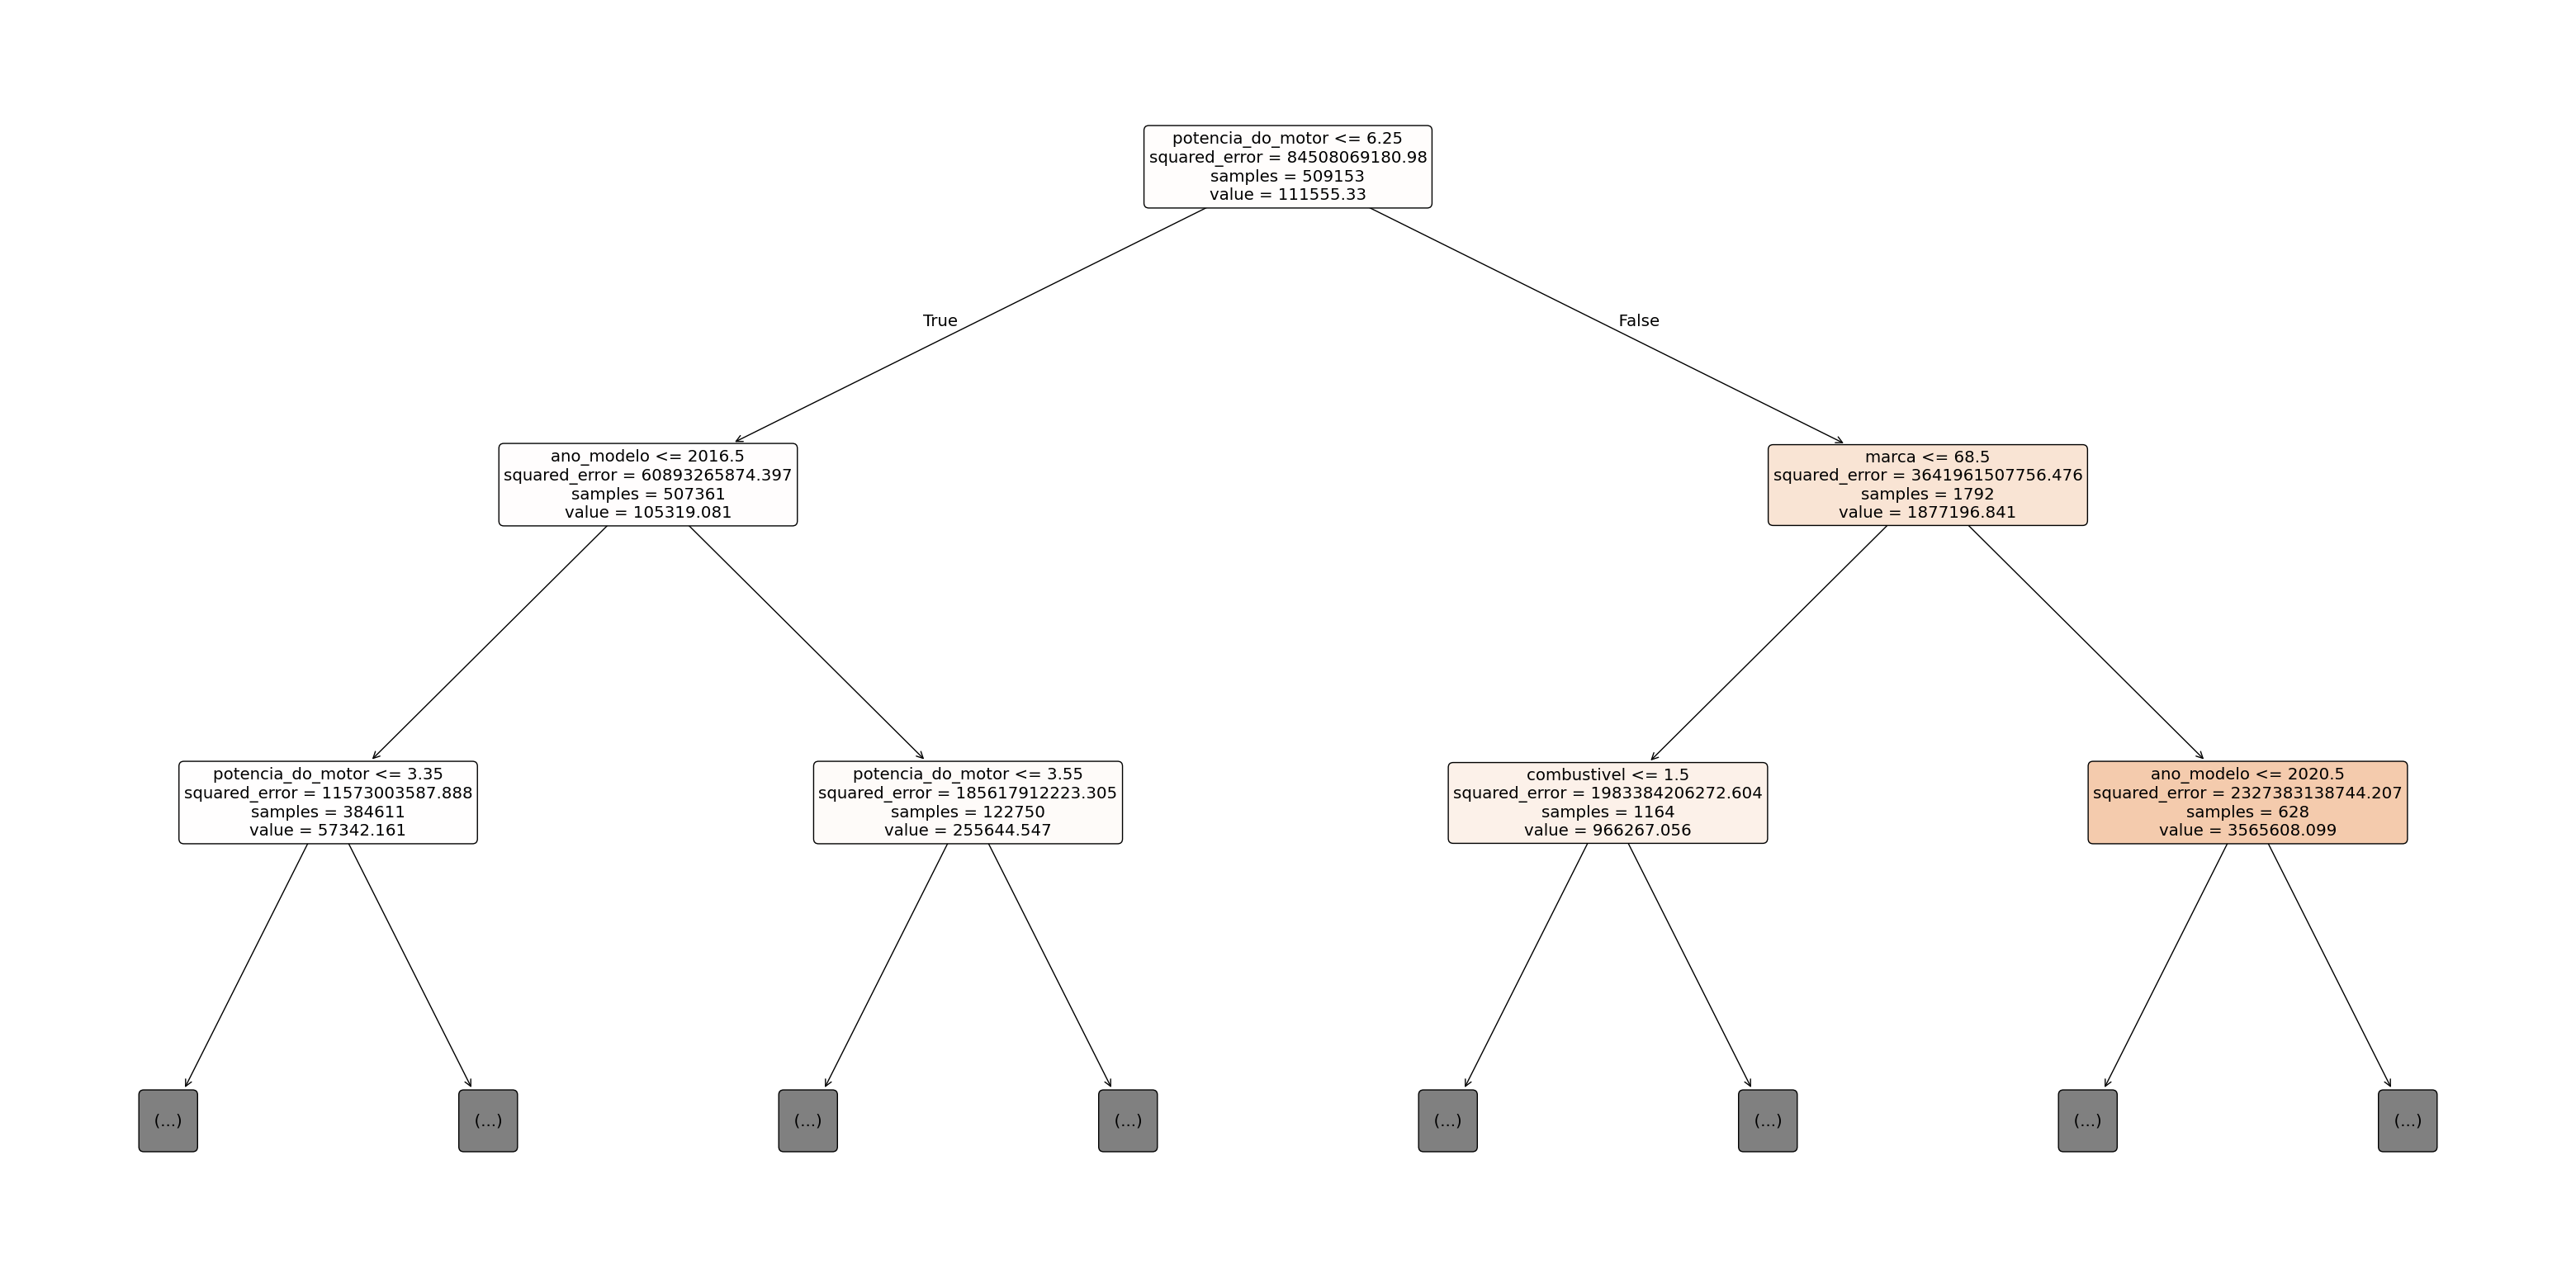

In [49]:
# Profundidade da árvore
print(f"Profundidade da árvore: {regressor_arvore_carros.get_depth()}")

# Ajustando o tamanho da figura
plt.figure(figsize=(40, 20))

# Plotando a árvore de decisão
tree.plot_tree(regressor_arvore_carros, filled=True, feature_names=nome_das_variaveis_independentes, rounded=True, max_depth=2)
plt.show()

**Interpretação dos resultados:** Podemos observar os pontos em que o modelo fez as divisões para tomar decisões e maximizar seu desempenho. Como vimos anteriormente, o atributo potencia_do_motor foi o mais importante, e por isso o primeiro corte ocorreu nesse atributo. À medida que a árvore se aprofunda, o erro médio (squared_error) vai diminuindo, e o valor previsto (value) também tende a diminuir. O campo ``samples`` indica a quantidade de elementos presentes em cada nó. Por exemplo, no primeiro corte, havia 507.361 elementos com potencia_do_motor menor ou igual a 6.25 cilindradas, enquanto 1.792 tinham mais que 6.25 cilindradas. Não exibi a árvore toda pois ela é bem profunda(42 nós).

### II\. Algoritmo: RandomForestRegressor

Agora vamos realizar o treinamento do modelo ``RandomForestRegressor``. O funcionamento é bem semelhante ao de uma árvore de decisão, mas, nesse modelo, passamos um parâmetro importante: o ``n_estimators``, que define a quantidade de árvores a serem utilizadas no treinamento, sendo 100 árvores por padrão. O ``RandomForestRegressor`` constrói várias árvores de decisão independentes e, ao final, calcula a média dos resultados dessas árvores para fazer a previsão final.

In [50]:
regressor_random_forest_carros = RandomForestRegressor(n_estimators=25)
regressor_random_forest_carros.fit(X_carro_treinamento, Y_carro_treinamento)

RandomForestRegressor(n_estimators=25)

**Avaliando o desempenho do modelo de regressão**

In [51]:
avalia_modelo_regressao(x=X_carro_teste, y=Y_carro_teste, modelo_regressao=regressor_random_forest_carros)

O R2 é: 0.9973368705907998
O MAE é: 3760.0887072815262
O MSE é: 230443511.05251873
O RMSE é: 15180.365972285343


**Interpretação dos resultados:** Podemos notar que com esse resultado o modelo ``RandomForestRegressor`` com 25 árvores está se saindo melhor, porém só teremos a confirmação mais precisa após aplicar a validação cruzada.

**Analisando a relevância dos atributos**

In [52]:
melhores_atributos_df = pd.DataFrame({
    "Atributos": nome_das_variaveis_independentes,
    "Relevância dos atributos": list(regressor_random_forest_carros.feature_importances_)
}).sort_values(by="Relevância dos atributos", ascending=False)

melhores_atributos_df

,Atributos,Relevância dos atributos
6,potencia_do_motor,0.454616
2,ano_modelo,0.197950
5,modelo,0.159577
4,marca,0.137570
7,combustivel,0.034302
8,cambio,0.007512
1,ano_de_referencia,0.004980
0,mes_de_referencia,0.002301
3,Idade_do_automovel,0.001193


**Interpretação dos resultados:** Os resultados da relevância dos atributos foram bem semelhantes aos que conseguimos no modelo ``DecisionTreeRegressor``, porém esse modelo adicionou mais peso ao atributo potencia_do_motor e retirou de alguns outros.

**Plotando a árvore** <br>

OBS: Como o algoritmo ``RandomForestRegressor`` faz o treinamento de várias árvores, para fazermos a plotagem precisamos selecionar uma das árvores, conseguimos selecioná-la através do atributo ``estimators_`` que possui uma lista com todas as árvores.

Profundidade da árvore: 44


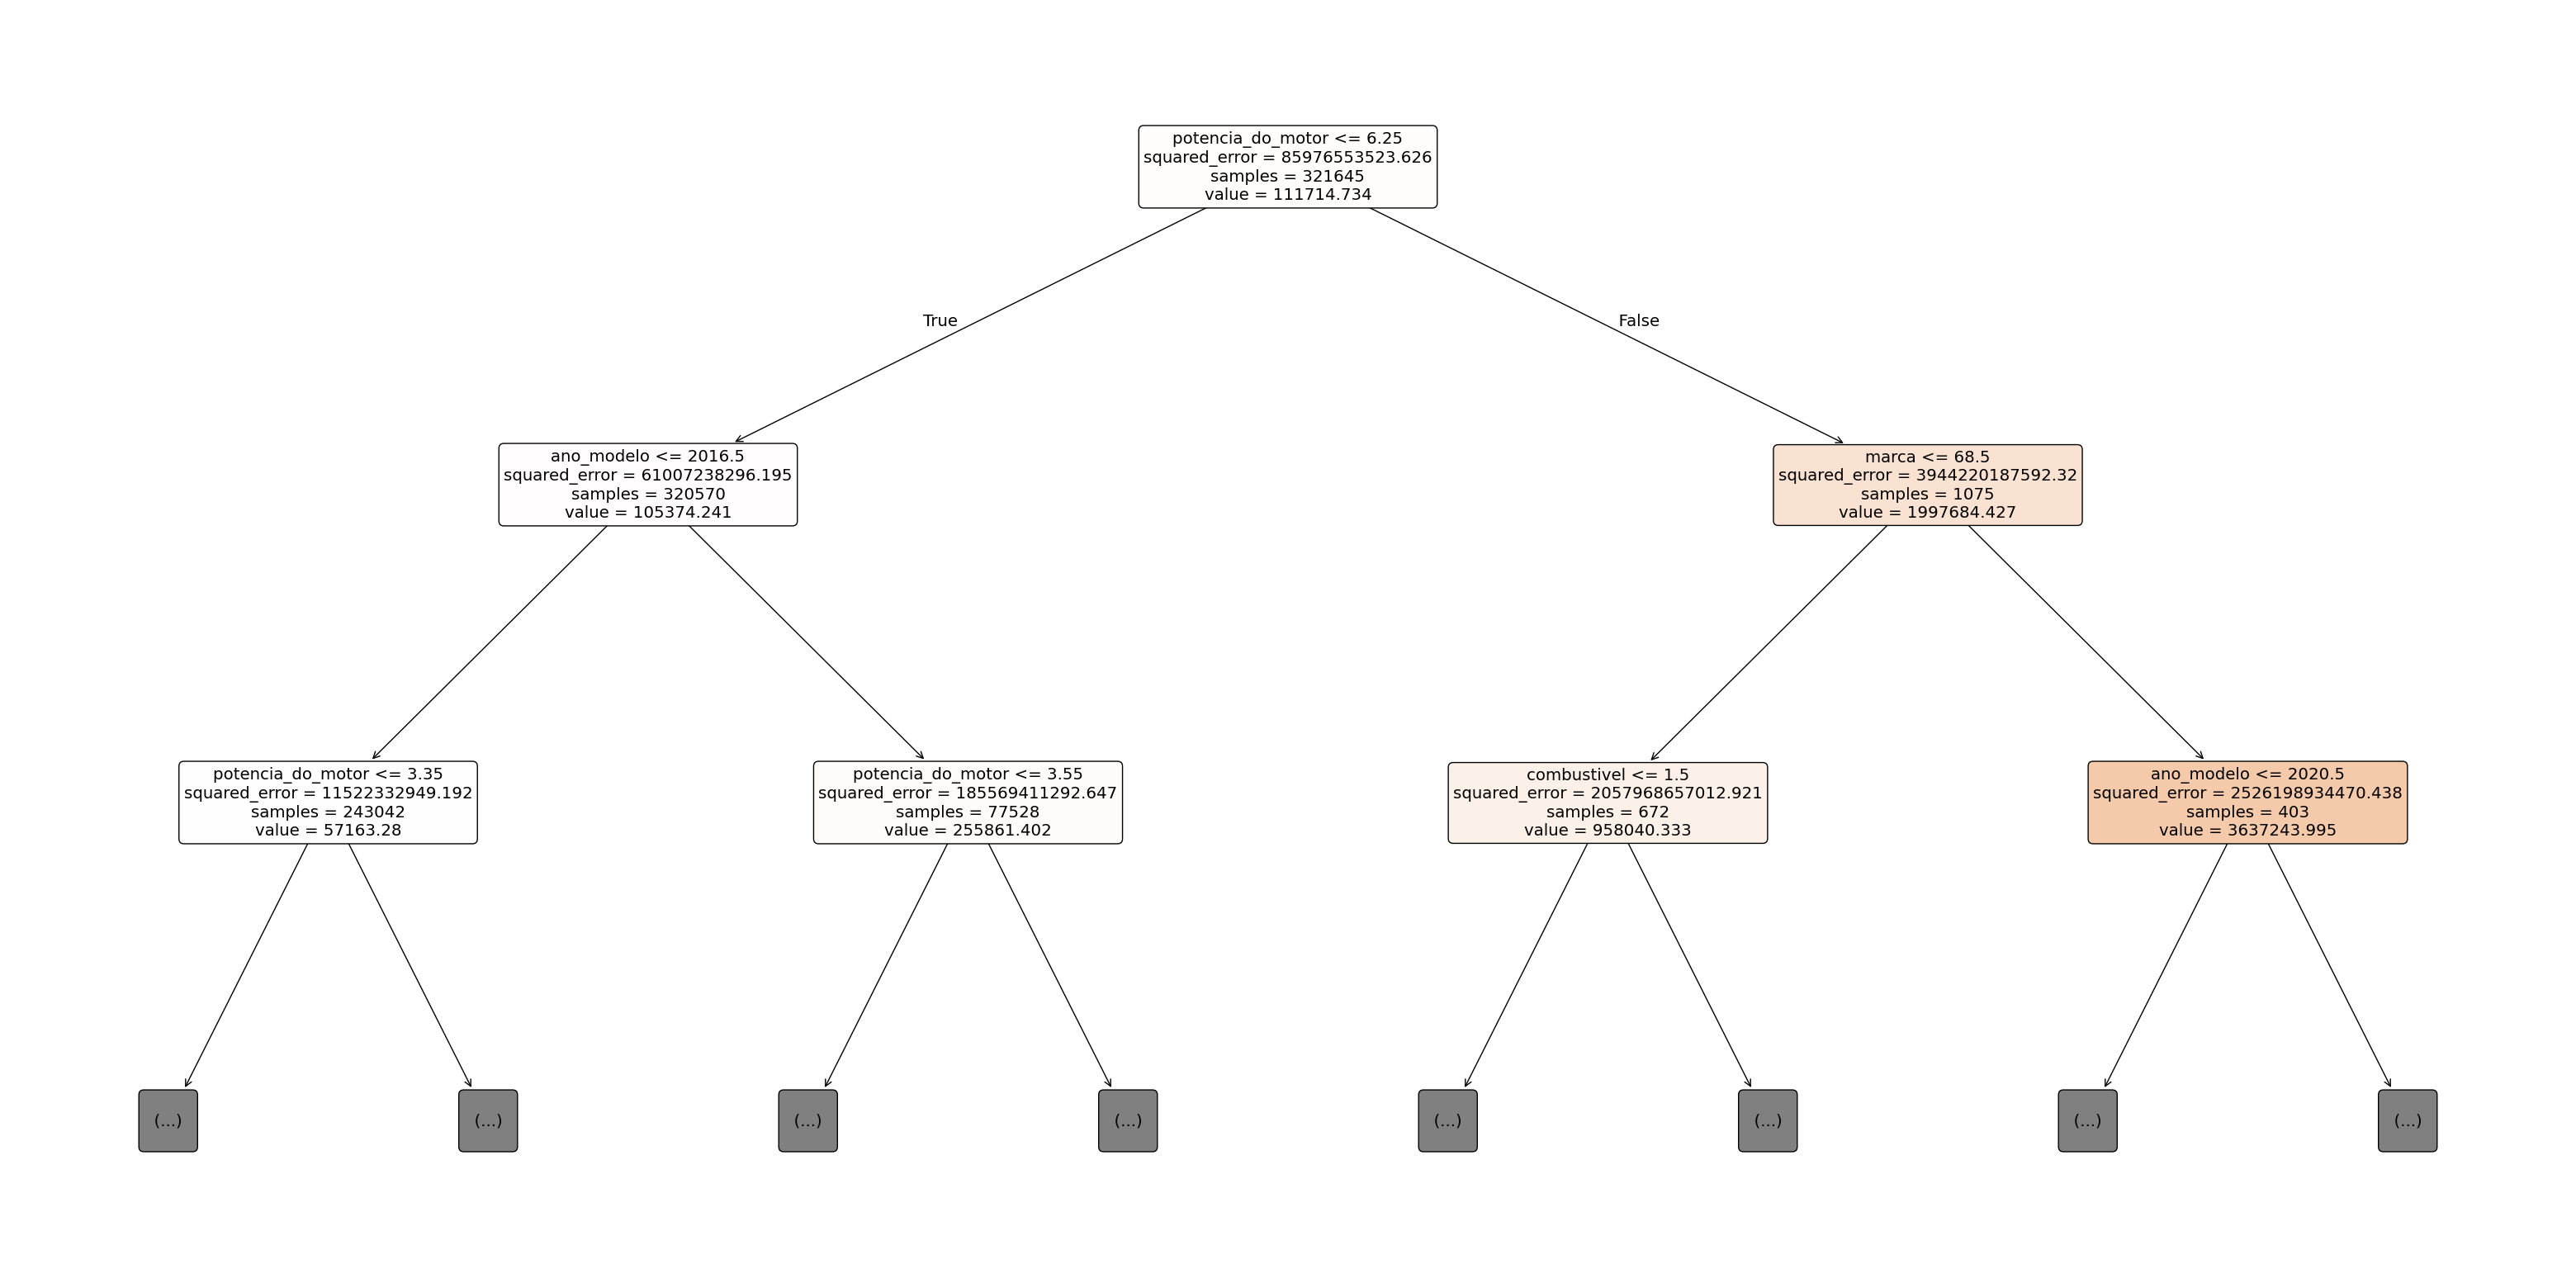

In [58]:
# Selecionando uma árvore da floresta
arvore_da_floresta = regressor_random_forest_carros.estimators_[0]  # Seleciona a primeira árvore

# Profundidade da primeira árvore
print(f"Profundidade da árvore: {arvore_da_floresta.get_depth()}")

# Ajustando o tamanho da figura
plt.figure(figsize=(40, 20))

# Plotando a árvore de decisão
tree.plot_tree(arvore_da_floresta, filled=True, feature_names=nome_das_variaveis_independentes, rounded=True, max_depth=2)
plt.show()

### III\. Tuning dos Parâmetros

**Você pode está se perguntando, para que serve o Tuning dos Parâmetros?** <br>

A finalidade principal de fazer o tuning dos parâmetros (ou ajuste de hiperparâmetros) é otimizar o desempenho do modelo de aprendizado de máquina, fazendo com que esses hiperparâmetros sejam melhor ajustados durante o treinamento, gerando assim um modelo consigo atingir um melhor desempenho. A escolha correta pode ter um impacto significativo nos resultados. Vale ressaltar também que quanto mais parâmetros adicionarmos para serem analisados, maior será o custo e o tempo computacional. Faremos a escolha desses parâmetros utilizando a biblioteca ``GridSearch`` do módulo ``sklearn.model_selection``

#### **Tunning dos Parâmetros do algoritmo ``DecisionTreeRegressor``**

Depois de importar o ``GridSearch`` o próximo passo é definirmos quais são e a quantidade de parâmetros que iremos utilizar no nosso modelo, para esse exemplo no algoritmo ``DecisionTreeRegressor`` utilizarei esses parâmetros abaixo, mas fique a vontade para utilizar outros parâmetros consultando a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) do modelo.

In [27]:
parametros_DecisionTree = {
    'max_features': ['auto', 'sqrt', 'log2'], # Número de recursos a serem considerados para cada divisão
    'criterion': ['mse', 'friedman_mse'], # Função de avaliação da qualidade da divisão
    'splitter': ['best', 'random'] # Estratégia para escolher as divisões
}

# Tempo de processamento: Menos de 20 segundos

O próximo passo é instanciaremos um objeto do ``GridSearchCV``, passando como parâmetros os parâmetros do modelo que definimos mais acima assim como qual o algorimo de regressão que utilizaremos, no nosso caso será o ``DecisionTreeRegressor()``. Depois utilizaremos a função .fit para descobrir os melhores parâmetros dentre todos que passamos. Observe que os parâmetros passando dentro da função fit não presiam ser variáveis que foram divididas em treino e teste, aprenas precisam ser as variáveis independentes e variável resposta.

In [ ]:
grid_search_DecisionTree = GridSearchCV( estimator=DecisionTreeRegressor(), param_grid=parametros_DecisionTree)

# "Treina" o modelo procurando os melhores parâmetros
grid_search_DecisionTree.fit(X_carros, Y_carros)

In [31]:
# Tras os melhores parâmetros encontrados
melhores_parametros_DecisionTree = grid_search_DecisionTree.best_params_
print(melhores_parametros_DecisionTree)

# Tras o melhor accuracy obtido dos resultados
melhor_resultado_DecisionTree = grid_search_DecisionTree.best_score_ 
print(melhor_resultado_DecisionTree)

{'criterion': 'friedman_mse', 'max_features': 'sqrt', 'splitter': 'best'}
0.9833643841959369


**Conclusão:** Podemos observar que após a análise do ``GridSearchCV`` conseguimos encontrar os melhores parâmetros dentre todos que passamos, com isso podemos utilizá-los na Validação Cruzada para entermos qual o melhor modelo.

#### **Tunning dos Parâmetros: ``RandomForestRegressor``**

Farmos o mesmo processão porém agora utilizando o algoritmo ``RandomForestRegressor``

Criação do dicionário com os parâmetros que iremos passar para o ``GridSearchCV`` analisar. Como esse modelo exige um pouco mais de tempo para ser processado, utilizarei menos parâmetros do que foram utilizando no modelo ``DecisionTreeRegressor``. Porém o incentivo a entender melhor sobre os outros parâmetros que podem ser utilizados no ``RandomForestRegressor`` consultando a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

In [32]:
parametros_RandomForest = {
    'n_estimators': [20, 25, 30],            # Número de árvores na floresta
    'max_features': ['auto', 'sqrt', 'log2'] # Número de recursos a serem considerados ao procurar a melhor divisão
}

**'Treino' do ``GridSearchCV`` para descobrimos os hiperparâmetros**

In [ ]:
grid_search_RandomForest = GridSearchCV( estimator=RandomForestRegressor(), param_grid=parametros_RandomForest)

# "Treina" o modelo procurando os melhores parâmetros
grid_search_RandomForest.fit(X_carros, Y_carros)

# # Tempo de processamento: ~9 Minutos

In [35]:
# Tras os melhores parâmetros encontrados
melhores_parametros_RandomForest = grid_search_RandomForest.best_params_
print(melhores_parametros_RandomForest)

# Tras o melhor accuracy obtido dos resultados
melhor_resultado_RandomForest = grid_search_RandomForest.best_score_ 
print(melhor_resultado_RandomForest)

{'max_features': 'log2', 'n_estimators': 25}
0.9904833803248199


### IV\. Validação cruzada

**Para que serve a Validação Cruzada?** <br>

A validação cruzada (ou cross-validation) é uma técnica utilizada para avaliar a performance de um modelo de machine learning de forma mais confiável, dividindo os dados em várias partes e treinando o modelo várias vezes. Em vez de treinar o modelo em uma única divisão (conjunto de treino e teste), o conjunto de dados é particionado em várias "dobras" (folds), e o modelo é treinado e testado em cada uma delas. <br>

Conforme mostrado na imagem abaixo, a amostra foi dividida em 5 partes (folds). Em cada iteração, uma das partes é usada como teste e as outras 4 são usadas como treino. Esse processo se repete para todas as divisões, ou seja, para cada fold definido. No exemplo da imagem, foram usadas 5 partes. Após o término das iterações, calcula-se a média das 5 performances obtidas. <br>

No nosso caso, faremos esse mesmo processo, mas com 10 partes, e repetiremos o processo 5 vezes, o que resulta em 50 testes diferentes, gerando 5 médias de performance para cada algoritmo.

[![Imagem do processo de Cross Validation](https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/featured_hubbc3c90efda00133c9815a673162bf54_130575_720x0_resize_lanczos_2.png)](https://zitaoshen.rbind.io/project/machine_learning/machine-learning-101-cross-vaildation/)

Neste código abaixo, realizamos um loop em que cada algoritmo passa por uma validação cruzada. Embora seja comum na comunidade científica realizar 30 iterações para garantir resultados robustos, devido ao tempo de execução estimado (cerca de 1h20min com os hiperparâmetros selecionados), optei por reduzir para apenas 5 repetições, o que diminui o tempo de processamento para aproximadamente 15 minutos. Caso queira aumentar o número de repetições, basta alterar o valor na seguinte linha:

```Python 
    for i in range(5): # Só alterar o 5 para 30 :)
```
**Explicação de algumas partes do código:**

- Utilizamos o código abaixo para personalizar o comportamento da função ``cross_validate``, que normalmente busca maximizar os resultados (quanto maior, melhor). No entanto, para o erro médio absoluto (MAE), quanto menor o valor, melhor. Portanto, definimos o parâmetro ``greater_is_better=False`` para inverter essa lógica ao calcular o MAE:
```Python 
        mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
```
- A quantidade de divisões da amostra (ou "folds") é determinada pelo parâmetro ``n_splits`` do objeto ``KFold``. Neste caso, usamos 10, que é um valor comumente aceito para validação cruzada;
- O parâmetro ``random_state=i`` define uma semente para garantir que, em cada iteração do loop a amostra seja dividida da mesma forma para ambos os algoritmos, mantendo a consistência na comparação;
- Os parâmetros utilizados nos dois modelos são os hiperparâmetros obtidos na etapa anterior de validação cruzada;
- Por fim, armazenamos em duas listas separadas a média do R² e do MAE de cada iteração, permitindo que façamos uma comparação clara entre os algoritmos ao final.

In [ ]:
# Função para customizar o cálculo do MSE e o cross_validate retornar os menores resultados envés dos maiores, pois quanto menor o MSE melhor o resultado
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Listas para armazenar os resultados
resultados_DecisionTree_R2 = []
resultados_DecisionTree_MAE = []
resultados_RandomForest_R2 = []
resultados_RandomForest_MAE = []

for i in range(5):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)
    
    # DecisionTreeRegressor
    regressor_DecisionTree_tuning = DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='best') # Utilizando os hiperparâmetros que encontramos
    resultado_DecisionTree = cross_validate(regressor_DecisionTree_tuning, X_carros, Y_carros, cv=kfold, scoring={'r2': 'r2', 'mae': mae_scorer})
    # Coletando o R² e MSE da DecisionTree
    resultados_DecisionTree_R2.append(resultado_DecisionTree['test_r2'].mean())
    resultados_DecisionTree_MAE.append(abs(resultado_DecisionTree['test_mae'].mean()))  # abs() para deixar positivo o resultado


    # RandomForestRegressor
    regressor_RandomForest_tuning = RandomForestRegressor(max_features='log2', n_estimators=25) # Utilizando os hiperparâmetros que encontramos
    resultado_RandomForest = cross_validate(regressor_RandomForest_tuning, X_carros, Y_carros, cv=kfold, scoring={'r2': 'r2', 'mae': mae_scorer})
    # Coletando o R² e MSE da RandomForest
    resultados_RandomForest_R2.append(resultado_RandomForest['test_r2'].mean())
    resultados_RandomForest_MAE.append(abs(resultado_RandomForest['test_mae'].mean()))  # abs() para deixar positivo o resultado


**Após a execução vamos criar uma DataFrame para conseguir usar o ``.describe()`` do pandas para analisar os resultados**

In [21]:
# Criar DataFrame com os resultados médios de cada uma das iterações
df_resultados = pd.DataFrame({
    'DecisionTree_R2': resultados_DecisionTree_R2,
    'DecisionTree_MAE': resultados_DecisionTree_MAE,
    'RandomForest_R2': resultados_RandomForest_R2,
    'RandomForest_MAE': resultados_RandomForest_MAE
})

# Exibe o DataFrame
df_resultados.describe()

,DecisionTree_R2,DecisionTree_MAE,RandomForest_R2,RandomForest_MAE
count,5.000000,5.000000,5.000000,5.000000
mean,0.986957,6814.757591,0.994950,5226.625962
std,0.000980,54.479155,0.000169,16.583343
min,0.986169,6743.351297,0.994767,5205.644667
25%,0.986440,6785.062880,0.994871,5219.906100
50%,0.986612,6809.656183,0.994883,5226.553864
75%,0.986923,6857.233870,0.995027,5229.812687
max,0.988641,6878.483724,0.995203,5251.212491


**Analisando os resultados:** Podemos concluir que, de acordo com os testes realizados, o algoritmo ``RandomForestRegressor`` apresentou um desempenho superior. Na segunda linha, a média do $R^2$ foi maior, indicando melhor ajuste do modelo, e o MAE foi menor, apontando um erro médio absoluto mais baixo. Na terceira linha, observamos que o desvio padrão tanto do $R^2$ quanto do MAE também foi menor, o que significa que o algoritmo produziu resultados mais consistentes e com menor variabilidade.

### V\. Prevendo🪄

**Efetuando a previsão de um valor que ainda não existe na nossa amostra**

Agora que já descobrimos qual é o melhor algoritmo de regressão, nosso objetivo é treinar o modelo definitivamente com todos os dados disponíveis para aproveitar o máximo de informações, não sendo necessário dividir a amostra em treino e teste. 

In [14]:
modelo_definitivo = RandomForestRegressor(max_features='log2', n_estimators=25) # Utilizando os hiperparâmetros que encontramos
modelo_definitivo.fit(X_carros, Y_carros) # Treinando o modelo com todo o conjunto de dados

RandomForestRegressor(max_features='log2', n_estimators=25)

In [15]:
avalia_modelo_regressao(X_carros, Y_carros, modelo_definitivo)

O R2 é: 0.999096159073316
O MAE é: 2100.6624177250637
O MSE é: 76656130.52804019
O RMSE é: 8755.348681122881


Iremos adicionar uma nova linha que ainda não existe em nossa base de dados, e iremos aplicar ao nosso algoritmo já treinado para que ele verifique qual é o preço médio desse novo carro. Sou fã da linha Civic da Honda, por isso criarei um novo modelo fictício dessa linha para testar qual será o preço médio com base nas credenciais que passados. Utilizarei como base o modelo Civic Sedan EX/ EXS 1.6 Mec. 4p, vamos imaginar que existiu um modelo em 2004, este modelo teria o motor 2.0 e seria uma versão com o câmbio automático. Qual seria seu preço médio?

```Python 
    [
        mes_de_referencia: 'December',
        ano_de_referencia: 2024,
        ano_modelo: 2004,
        Idade_do_automovel: 20,
        marca: 'Honda',
        modelo: 'Civic Sedan EX/ EXS 1.6 Mec. 4p',
        potencia_do_motor: 2.0,
        combustível: 'Gasoline',
        cambio: 'automatic' 
    ]
```

In [ ]:
hondaCivic_df = df_FIPE_carros.query("modelo.str.contains('Civic Sedan EX/ EXS 1.6 Mec. 4p')")
hondaCivic_df.head()

,mes_de_referencia,ano_de_referencia,ano_modelo,Idade_do_automovel,marca,modelo,potencia_do_motor,combustivel,cambio,preco_medio_FIPE
10006,January,2021,1997,24,Honda,Civic Sedan EX/ EXS 1.6 Mec. 4p,1.6,Gasoline,manual,11083.0
10007,January,2021,1996,25,Honda,Civic Sedan EX/ EXS 1.6 Mec. 4p,1.6,Gasoline,manual,10469.0
10008,January,2021,1995,26,Honda,Civic Sedan EX/ EXS 1.6 Mec. 4p,1.6,Gasoline,manual,10028.0
10009,January,2021,1994,27,Honda,Civic Sedan EX/ EXS 1.6 Mec. 4p,1.6,Gasoline,manual,9141.0
10010,January,2021,1993,28,Honda,Civic Sedan EX/ EXS 1.6 Mec. 4p,1.6,Gasoline,manual,8855.0


In [ ]:
print(f"Esse modelo só está disponível com {hondaCivic_df['potencia_do_motor'].unique()[0]} cilindradas")
print(f"Único tipo de câmbio é o: {hondaCivic_df['cambio'].unique()[0]}")
print(f"O ano das versões desse modelo era entre {hondaCivic_df['ano_modelo'].min()} e {hondaCivic_df['ano_modelo'].max()}")
print(f"O preço médio desse caro varia entre R$ {hondaCivic_df['preco_medio_FIPE'].min()} e R$ {hondaCivic_df['preco_medio_FIPE'].max()}")

Esse modelo só está disponível com 1.6 cilindradas
Único tipo de câmbio é o: manual
O ano das versões desse modelo era entre 1992 e 1997
O preço médio desse caro varia entre R$ 6531.0 e R$ 15119.0


**Conclusão:** Algumas informações sobre esse modelo provam que não existiu uma versão do ano de 2004, com o câmbio Automático e motor de 2.0 Cilindradas 

**Efetuando a previsão desse novo modelo**

In [16]:
novo_valor_para_prever( 
    [[
        'December',                         # mes_de_referencia
        2024,                               # ano_de_referencia
        2004,                               # ano_modelo
        20,                                 # idade_do_automovel
        'Honda',                            # marca
        'Civic Sedan EX/ EXS 1.6 Mec. 4p',  # modelo
        2.0,                                # potencia_do_motor
        'Gasoline',                         # combustivel
        'automatic'                         # cambio
    ]]
, modelo_treinado=modelo_definitivo)

A previsão do preço médio para esse novo modelo é: 23800.72


**Conclusão:** Podemos observar que esse novo modelo teria o preço médio aproximado de R\$ 23.800,72 <br>
**OBS:** Lembrando que como nosso MAE foi de 2.100, siginifica que o preço médio que prevemos tem uma margem de erro de aproximadamente R\$ 2.100 para mais ou para menos.